Look into the following pages to begin or find documentation on the python librairies used here:
- http://www.python.org
- http://scipy.org
- http://www.numpy.org
- http://scikit-learn.org/stable/index.html
- http://www.loria.fr/~rougier/teaching/matplotlib/matplotlib.html

## Introduction


In this lab session, we will work on a first practical application of supervised learning, which is arguably the simplest one: **binary supervised classification**. We will generate artificial data from two different sources, and we will try to learn a classifier that will be able to separate the data, using the **perceptron**. 

### Definitions and notations

- $\mathcal{X}$ is a set of *examples/observations/samples* $\mathbf{x} = (x_1, x_2, ..., x_p) \in \mathbb{R}^p$. We call $x_j$ the value taken by the $j$-th variable of $\mathbf{x}$, or its $j$-th *feature*.
- $\mathcal{Y}$ is the set of labels. We are in the **binary** case: there is only two possible labels. We choose to note them $\{ -1, 1\}$, which will make things easy by allowing us to work with the ```sign``` function.
- $\mathcal{D}_n = \{(x_i, y_i), i=1, .., n\}$ is a dataset containing $n$ examples and their labels. 
- There exists a probabilistic model governing the generation of our data given i.i.d random variables $X$ and $Y$: $\forall i \in \{ 1, ..., n \}, (x_i, y_i) \sim (X, Y)$
- We would like to build, from $\mathcal{D}_n$, a function that we call a *classifier*, $$\hat{f}: \mathcal{X} \rightarrow \{ -1, 1 \}$$ which for a new data point $\mathbf{x}_{new}$ will give a label $\hat{f}(\mathbf{x}_{new})$.

In [1]:
"""From a lab created on Mon Sep 23 17:50:04 2013 by baskiotis, salmon, gramfort
Modified on Mon Nov 4 21:09:38 2019 by mozharovskyi
Modified on Wed Feb 17 by labeau"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
from matplotlib import rc

################################################################
# Code for displaying labeled data - no understanding needed ! #
################################################################

symlist = ['o', 'p', '*', 's', '+', 'x', 'D', 'v', '-', '^']

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

## Generating artificial data 

For our first experiment, and in order to visualize what is happening, we will work with only two features (so, with $p=2$) so that we can plot the data and the classifier. 

1) Take a look at the function ```rand_gauss(n, mu, sigma)```: this function returns $n$ samples following the multi-dimensional normal distribution, with mean the vector $\mu =$ ```mu```, and with the covariance matrix $\Sigma$ being the diagonal matrix of the vector ```sigmas``` $=[ \sigma_1, \sigma_2]$. Hence, the matrix $$\Sigma = \begin{pmatrix}
\sigma_1&0 \\
0 &\sigma_2
\end{pmatrix}$$
Now, generate different datasets from the function ```rand_bi_gauss``` function. What does the second output correspond to ? 

In [2]:
def rand_gauss(n=100, mu=[1, 1], sigmas=[0.1, 0.1]):
    """Sample  points from a Gaussian variable.
    Parameters
    ----------
    n : number of samples
    mu : centered
    sigma : standard deviation
    """
    d = len(mu)
    res = np.random.randn(n, d)
    return np.array(mu + res * sigmas)


def rand_bi_gauss(n1=100, n2=100, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.1, 0.1],
                  sigmas2=[0.1, 0.1]):
    """Sample points from two Gaussian distributions.
    Parameters
    ----------
    n1 : number of sample from first distribution
    n2 : number of sample from second distribution
    mu1 : center for first distribution
    mu2 : center for second distribution
    sigma1: std deviation for first distribution
    sigma2: std deviation for second distribution
    """
    ex1 = rand_gauss(n1, mu1, sigmas1)
    ex2 = rand_gauss(n2, mu2, sigmas2)
    y = np.hstack([np.ones(n1), -1 * np.ones(n2)])
    X = np.vstack([ex1, ex2])
    ind = np.random.permutation(n1 + n2)
    return X[ind, :], y[ind]

In [41]:
#Let's generate some data with the second function :
dataset = []
X,Y = [],[]
for i in range(20):
    dataset.append(rand_bi_gauss())
    X.append(dataset[i][0])
    Y.append(dataset[i][1])

In [31]:
dataset[0][1]

array([ 1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,
        1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
       -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
        1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,
       -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,
        1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1

In [48]:
X = np.vstack(X)
Y = np.hstack(Y)
#To comply with notations further down.

<strong> Question 1. </strong> </br>
The second output of the rand_bi_gaus function corresponds to labels, randomly shuffled into an array of the same size of the multivariate gaussians created by the first function. Each one is associated to a 2-d gaussian from the first function. In other words, there are $+1$ for the first kind of multivariate gaussian (mean $[1,1]$) and $-1$ for the second one (mean $[-1,-1]$), and we shuffled data + labels with the second function, the second output containing the labels.</br>
To generate them, we first generate matrices full of $+1$ of size $n_1$ corresponding to $ex1$ (resp. $-1$ as $n_2$ and $ex2$)
Then we stack them in the y array which contains all labels and finally with the np.random.permutation(n1 + n2) and y[ind] calls we read randomly the label array which in the end means we have a random array of labels.

2) Keep some of these datasets to use them in the rest of the lab. For each of them, save them as a numpy array with two coloumns for $X$, and as a vector for $Y$. Use the function ```plot_2d``` allowing you to visualize the data with their associated labels.

In [45]:
def plot_2d(X, y, w=None, step=50, alpha_choice=1):
    """2D dataset data ploting according to labels.
    Parameters
    ----------
    X : data features
    y : label vector
    w :(optional) the separating hyperplan w
    alpha_choice : control alpha display parameter
    """
    min_tot0 = np.min(X[:, 0])
    min_tot1 = np.min(X[:, 1])

    max_tot0 = np.max(X[:, 0])
    max_tot1 = np.max(X[:, 1])
    delta0 = (max_tot0 - min_tot0)
    delta1 = (max_tot1 - min_tot1)
    labels = np.unique(y)
    k = np.unique(y).shape[0]
    color_blind_list = sns.color_palette("colorblind", k)
    sns.set_palette(color_blind_list)
    for i, label in enumerate(y):
        label_num = np.where(labels == label)[0][0]
        plt.scatter(X[i, 0], X[i, 1],
                    c=np.reshape(color_blind_list[label_num], (1, -1)),
                    s=80, marker=symlist[label_num])
    plt.xlim([min_tot0 - delta0 / 10., max_tot0 + delta0 / 10.])
    plt.ylim([min_tot1 - delta1 / 10., max_tot1 + delta1 / 10.])
    if w is not None:
        plt.plot([min_tot0, max_tot0],
                 [min_tot0 * -w[1] / w[2] - w[0] / w[2],
                  max_tot0 * -w[1] / w[2] - w[0] / w[2]],
                 "k", alpha=alpha_choice)

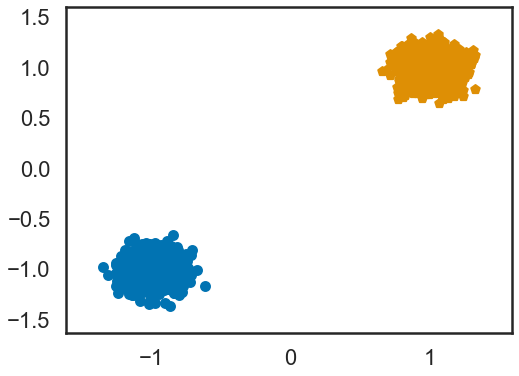

In [46]:
plot_2d(X,Y)

## The perceptron

#### Linear classifiers (affine)

A **linear classifier** is a classifier associating to each observation $x$ a label in $\mathcal{Y}$ given its position related to an **affine hyperplane**. Each linear classifier is therefore linked to an affine hyperplan of $\mathbb{R}^p$, which we define by its **directing vector** (or normal vector) $\mathbf{w} = (w_0, w_1, ..., w_p) \in \mathbb{R}^p$. Note the supplementary dimension: it is used for what we call the *intercept* $w_0$ of the classifier (in French, *ordonnée à l'origine*). Geometrically, this allows the hyperplane to not go through the origin, and be shifted anywhere in the space. 
The hyperplane is then given by:
$$ H_{\mathbf{w}}=\left\{ \mathbf{x} \in \mathbb{R}^{p} : \hat{f}_{\mathbf{w}}(\mathbf{x}):=
w_0 +\sum_{j=1}^p w_j x_j=0 \right\}. $$

In order to classify an observation $\mathbf{x}$ (i.e, affect a label $1$ or $-1$, we use the function $sign(f(\mathbf{x}))$, where the $sign$ function is defined as:
$$ sign(x)=
\begin{cases}
 1,& \text{ si } x\geq0,\\
-1,& \text{ si } x<0
\end{cases}
\enspace . $$

Hence, the function  $\mathbf{x} \mapsto sign ( \hat{f}_{\mathbf{w}}(\mathbf{x}))$ is the binary classifier of linear separation defined by $\mathbf{w}$. The objective of the perceptron is to find an hyperplane which separates in the best possible way the data, into two groups. We would like to have, on each side of the hyperplane, labels separated into homogenous groups. The vector $\mathbf{w}$ is called a **weight vectors**. 

For the next questions, you should reuse the datasets you obtained previously.

3) What does the linear separation given by the perceptron in dimension $p=2$ ? See if you can find (visually) a good separation for your datasets. When is $\hat{f}_{\mathbf{w}}(\mathbf{x})$ large ? Negative ? Positive ? How can that function be interpreted geometrically ? What does $w_0$ corresponds to on the linear separation you found on your data ?

4) Check that the function ```predict(x,w)``` takes, as input, a vector $\mathbf{x} \in \mathbb{R}^p$ and a weight vector $\mathbf{w} \in \mathbb{R}^{p+1}$ and outputs the prediction $\hat{f}_{\mathbf{w}}(\mathbf{x})$. Then, check that ```predict_class(x,w)``` outputs the predicted label $sign\left(\hat{f}_\mathbf{w}(\mathbf{x})\right)$.

<strong> Question 3. </strong> </br>
The linear seperation in dimension 2 will look like a line dividing the plane in two different regions, and we would like these two regions to each contain one kind of data (like data associated to label $+1$ on one side, and data associated to label $-1$ on the other side).
</br>
A very easy separation for our dataset would be the line given by $y = -x$ in our case, which would split on one side the orange dots of positive mean and on the other side the blue dots of negative mean.
</br>
$\hat{f}_{\mathbf{w}}(\mathbf{x})$ is large for points that are far from the hyperplane defined by our seperation line (can be a n-dimensional hyperplane indeed).
</br>
$\hat{f}_{\mathbf{w}}(\mathbf{x})$ is negative for points that are below the line, that is, the blue dots, and positive for the points above the line, that is, the orange dots.
</br>
And, as the $y = -x$ line we found crosses the origin, we deduce $w_0 = 0$

In [47]:
def predict(x, w):
    """Prediction from a normal vector."""
    return np.dot(x, w[1:]) + w[0])


def predict_class(x, w):
    """Predict a class from at point x thanks to a normal vector."""
    return np.sign(predict(x, w))

<strong> Question 4. </strong> </br>
predict(x,w) takes for arguments a vector x of a certain length and w of a certain length. But because of the splice w[1:] in the call np.dot(), we know w is a dimension higher than x. So x is of dimension p, w of dimension p+1. </br>
Now, the np.dot() function returns the product of two vectors (scalar product), and there's the addition of w[0], so the function returns $\sum_{i=0}^{p} x[i]$*$w[i+1] + w[0]$ which is exactly the prediction $\hat{f}_{\mathbf{w}}(\mathbf{x})$ with the weighted sum.

</br>
And as our classifier is exactly $sign(\hat{f}_{\mathbf{w}}(\mathbf{x}))$, the functions np.sign and predict do exactly what we want and apply the classifier.

### Perceptron learning rule

The **perceptron algorithm** consists in detecting when there is a mistake, meaning that there is a point that is misclassified, and moving $\mathbf{w}$ towards having this point on the 'right side' of the hyperplane. The change in $\mathbf{w}$ for a case when the point is misclassified is described by the following learning rule (Rosenblatt's):
$$\mathbf{w}\leftarrow\mathbf{w}+\epsilon \begin{pmatrix}1 \\ \mathbf x_i \end{pmatrix}\cdot y_i$$
where $\epsilon$ is a *learning step*, which indicates how much we correct $\mathbf{w}$. The method is iterative: we will go through all examples we have in our data and update the points accordingly. 
Then, the algorithm is as follows:

- **Data**: 
    - The observations and their labels $\mathcal{D}_n=\{(\mathbf{x}_i,y_i): 1\leq i \leq n\}$
    - The gradient step: $\epsilon$
    - The maximal number of iterations: $n_{iter}$

- **Result**: 
    - $\mathbf{w}$ 
- Randomly initialize $\mathbf{w}$; initialize $j=0$
- While ${j\leq n_{\rm iter}}$ 
    - $\mathbf{w}\leftarrow\mathbf{w}$
    - For $i=1$ to $n$:
        - if $\hat{f}_{\mathbf{w}}(\mathbf{x}) \cdot y_i \leq 0$
            - $\mathbf{w}\leftarrow\mathbf{w}+\epsilon \begin{pmatrix}1 \\ \mathbf x_i \end{pmatrix}\cdot y_i$
        - $j\leftarrow j+1$
        
The code for this procedure is given in the ```perceptron``` function:

In [68]:
def perceptron(x, y, eps, niter, w_ini):
    """ algorithme du perceptron:
        - x : donnees
        - y : label
        - eps : facteur multiplicatif de descente
        - niter : nombre d'iterations
        - w_ini
        """
    w = np.zeros((niter, w_ini.size))
    w[0] = w_ini
    for j in range(0, niter-1):
        for i in range(x.shape[0]):
            if y[i] * predict(x[i, :], w[j, :]) < 0:
                w[j, :] += eps * y[i] * np.hstack((np.ones((1,)), x[i, :]))
        w[j+1, :] = w[j, :] 
    return w

5) Test the perceptron algorithm on the following parameters and look at how $\mathbf{w}$ evolves during the iterations. 

In [103]:
### FIRST SET OF ITERATIONS, low variances
# Choose an epsilon
epsilon = 0.2
# A number of iterations
niter = 10
# Initialize w_ini
std_ini = 1.
w_ini = std_ini * np.random.randn(X.shape[1] + 1)

w_iter = perceptron(X, Y, epsilon, niter, w_ini)
w_iter

array([[0.24061134, 2.22111556, 0.68489248],
       [0.24061134, 2.22111556, 0.68489248],
       [0.24061134, 2.22111556, 0.68489248],
       [0.24061134, 2.22111556, 0.68489248],
       [0.24061134, 2.22111556, 0.68489248],
       [0.24061134, 2.22111556, 0.68489248],
       [0.24061134, 2.22111556, 0.68489248],
       [0.24061134, 2.22111556, 0.68489248],
       [0.24061134, 2.22111556, 0.68489248],
       [0.24061134, 2.22111556, 0.68489248]])

We notice that right at the first iteration, the coefficients of the weights are already the final coefficients, which means the algorithm converged instantly, in only one step. Which isn't surprising given how easy the classification is for our problem. Low variance, and very distinct means. This easy problems makes it "too easy" for the algorithm, because no step could make errors, all classification iterations go in the "same direction". 
</br> Let's generate new data, new X1 and Y1 so that we can make them overlap a little, without making the task too hard. 

In [149]:
#SECOND SET OF ITERATIONS, high variances
#Let's generate some data with the second function :
dataset = []
X1,Y1 = [],[]
for i in range(20):
    dataset.append(rand_bi_gauss(sigmas1 = [1.5,-2], sigmas2 = [2,-1.5]))
    X1.append(dataset[i][0])
    Y1.append(dataset[i][1])
X1 = np.vstack(X1)
Y1 = np.hstack(Y1)

w_ini1 = std_ini * np.random.randn(X1.shape[1] + 1)
w_iter1 = perceptron(X1, Y1, epsilon, niter, w_ini1)

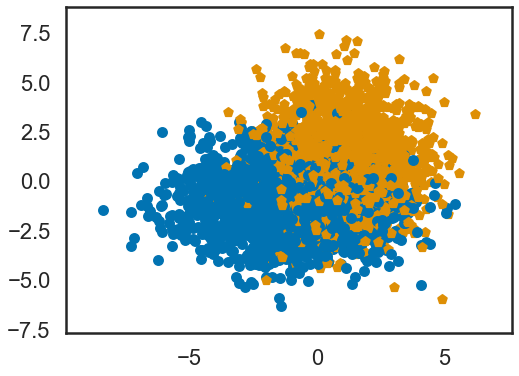

In [150]:
plot_2d(X1,Y1,alpha_choice=0.01)

In [151]:
#As we can see the dots overlap themselves a lot, which will make the task harder for the algorithm and slow down the convergence. 
#We will now look at the coefficients from w :
w_iter1

array([[0.65048307, 0.15651132, 0.59029269],
       [0.45048307, 0.24873439, 0.46146487],
       [0.65048307, 0.39596513, 0.54508441],
       [0.45048307, 0.88950658, 0.70400959],
       [0.25048307, 0.73819226, 0.4802443 ],
       [0.65048307, 0.50755859, 0.49699728],
       [0.65048307, 0.49666566, 0.48925348],
       [0.25048307, 0.90383694, 0.76253328],
       [0.65048307, 0.42287236, 0.45125608],
       [0.65048307, 0.42287236, 0.45125608]])

This time the convergence is slower, and we need 9 iterations to reach the final state. This is not surprising, as the two sets of points (I mean the two different labelled sets of points) were much closer to each other and overlapped a bit. 

Now we saw what it numerically looks like, let's the evolution of the weights, but instead of just plotting basically the weights, let's plot how it makes the separation line evolve. This is the object of question 6.

<strong> 6) Display on the same figure the evolution of the boundaries according to the iterations. We can use the ```plot_2d``` function and its ```alpha_choice``` argument for that purpose. </strong>

We remind the equation of the hyperplane, and we translate it to our specific case :
$$ H_{\mathbf{w}}=\left\{ \mathbf{x} \in \mathbb{R}^{p} : \hat{f}_{\mathbf{w}}(\mathbf{x}):=
w_0 +\sum_{j=1}^p w_j x_j=0 \right\}. $$
which can be translated as 
$$ H_{\mathbf{w}}=\left\{ \mathbf{(x,y)} \in \mathbb{R}^{2} : y = x_2 = - \dfrac{w_1}{w_2} x_1 - \dfrac{w_0}{w_2}   \right\}. $$

Of course I didn't mention it but we are working with lines as a hyperplane in $\mathbb{R}^2$ is a line.

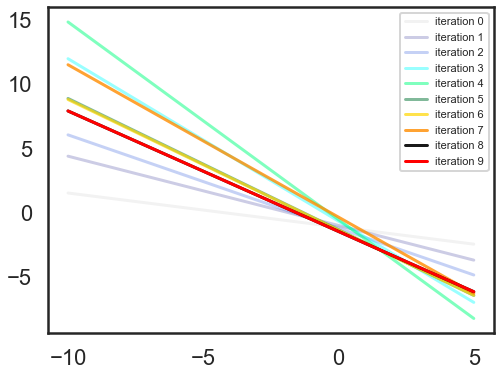

In [152]:
#I don't see how plot_2d and alpha_choice (that is not working I think) can help me there, so I code something from scratch.
#We extract the weights and craft the boundary line we'll plot.
w0,w1,w2 = [],[],[]
abs = np.linspace(-10,5)
colors = ['gray', 'navy', 'royalblue', 'aqua', 'springgreen', 'seagreen', 'gold', 'darkorange', 'black', 'red']

for i in range(len(w_iter1)):
    w0.append(w_iter1[i][0])
    w1.append(w_iter1[i][1])
    w2.append(w_iter1[i][2])

def f(w0, w1, w2, x):
    L = []
    for j in range(len(w_iter1)):    
        tmp = []
        for i in range(len(x)):
            tmp.append(-(w1[j]*x[i])/w2[j]-w0[j]/w2[j])
        L.append(tmp)
    return L

y = f(w0,w1,w2,abs)
for i in range(len(w_iter1)):
    plt.plot(abs,y[i], color = colors[i], label = 'iteration ' + str(i),alpha = (1+i)*10**(-1))
plt.legend(loc=1, prop={'size': 11})
plt.show()
#The lines will be more visible as the convergence reaches the end.
#I also colored iteration 8 a completely different color from iteration 9 so we can see they're the same.

### General case: cost function

While the perceptron algorithm we saw works geometrically, in general, in order to measure the error associated to an entire dataset $\mathcal{D}_n$ it is necessary to set a loss function $\ell:\mathbb{R}\times\mathcal{Y} \mapsto \mathbb{R}^+$ which measures the cost $h$ of an error $i$ when predicting an example.
The cost that we want to minimize (as a function of $\mathbf{w}$) is $\mathbb{E} \left[ \ell(\hat{f}_{\mathbf{w}}(\mathbf{x}),y)\right]$, the expectation of the loss function on all the data. Three loss functions are commonly used and defined below :
- the error percentage: $ZeroOneLoss(\hat{f}_{\mathbf{w}}(\mathbf{x}), y) = |y-sign(\hat{f}_{\mathbf{w}}(\mathbf{x}))|/2$,
- the quadratic error: $MSELoss(\hat{f}_{\mathbf{w}}(\mathbf{x}), y) = (y-\hat{f}_{\mathbf{w}}(\mathbf{x}))^2$,
- the hinge error (*charnière* in French): $HingeLoss(\hat{f}_{\mathbf{w}}(\mathbf{x}), y) = \max(0,1-y \cdot \hat{f}_{\mathbf{w}}(\mathbf{x}))$.
The purpose here is to study these different loss functions. These three functions are already implemented, as well as their associated gradient:

In [143]:
def zero_one_loss(x, y, w):
    """0-1 loss function."""
    return abs(y - np.sign(predict(x, w))) / 2.

def hinge_loss(x, y, w):
    """Hinge loss function."""
    return np.maximum(0., 1. - y * predict(x, w))

def mse_loss(x, y, w):
    """Mean square error loss."""
    return (y - predict(x, w)) ** 2

def gr_hinge_loss(x, y, w):
    """Sub-gradient of the loss function hingeloss."""
    return np.dot(-y * (hinge_loss(x, y, w) > 0.),
                  np.hstack((np.ones((x.shape[0], 1)), x)))


def gr_mse_loss(x, y, w):
    """Gradient of the least squares lost function."""
    return -2. * np.dot(y - predict(x, w),
                        np.hstack((np.ones((x.shape[0], 1)), x)))

7) Suppose that $\mathbf{x} \in \mathbb{R}^p$ and $y \in \mathbb{R}$ are fixed. What is the nature of the functions $\mathbf{w} \mapsto \ell(\hat{f}_{\mathbf{w}}(\mathbf{x}),y)$ for the three losses studied: constant, linear, quadratic, piecewise constant, linear by pieces, quadratic by pieces, etc. ?

For the <strong> zero_one_loss </strong> , $\mathbf{w} \mapsto \ell(\hat{f}_{\mathbf{w}}(\mathbf{x}),y)$ is piecewise constant (because of the sign function, basically)
</br>
For the <strong> hinge_loss </strong>, $\mathbf{w} \mapsto \ell(\hat{f}_{\mathbf{w}}(\mathbf{x}),y)$ is linear by pieces (because of the max function, with one side constant and the other one linear)
</br>
For the <strong> mse_loss </strong>, $\mathbf{w} \mapsto \ell(\hat{f}_{\mathbf{w}}(\mathbf{x}),y)$ is quadratic (because fw(x) is continuous w.r.t. w and because of the square)

## Stochastic gradient descent algorithm

In the general case, it is of course impossible to do an exhaustive search of the space $\mathbb{R}^{p+1}$ where evolves $\mathbf{w}$ to minimize the gradient of $\mathbf{w} \mapsto \ell(\hat{f}_{\mathbf{w}}(\mathbf{x}),y)$ in order to find the minimum cost. Moreover, we cannot observe $\mathbb{E} \left[ \ell(\hat{f}_{\mathbf{w}}(\mathbf{x}),y)\right]$, so we can only try to **minimize its empirical counterpart**: $$\sum_{i=1}^n \ell(\hat{f}_{\mathbf{w}}(\mathbf{x}_i),y_i)$$


The **perceptron algorithm** actually consists in using a variant of the gradient descent algorithm, which is the usual method of optimizing a differentiable function. Here, at each step, the current weight is corrected in the same direction as the gradient, but in the opposite sense. The algorithm converges in the general case to a local minimum as long as $\epsilon$, which we now call the **gradient step** is well chosen. Moreover, the minimum reached is global for convex functions.

The stochastic gradient method is a variant which proposes not to directly use the gradient, which requires calculating a sum on the $n$ observations, but rather to draw (randomly ... or not) a pair $(\mathbf{x}_i , y_i )$ on which a gradient is calculated. We can also show that this algorithm converges under certain conditions.

The **perceptron algorithm** is now described as follows:

- **Data**: 
    - The observations and their labels $\mathcal{D}_n=\{(\mathbf{x}_i,y_i): 1\leq i \leq n\}$
    - The gradient step: $\epsilon$
    - The maximal number of iterations: $n_{iter}$

- **Result**: 
    - $\mathbf{w}$ 
- Randomly initialize $\mathbf{w}$; initialize $j=0$
- While ${j\leq n_{\rm iter}}$ 
    - $\mathbf{w}\leftarrow\mathbf{w}$
    - For $i=1$ to $n$:
        - $\mathbf{w}\leftarrow\mathbf{w}-\epsilon\nabla_\mathbf{w}\ell( \hat{f}_{\mathbf{w}}(\mathbf{x}_i, y_i))$
        - $j\leftarrow j+1$

The code for this procedure is given in the ```gradient``` function:

*Note: The stochastic gradient method is also available in ```sklearn``` under the name ```SGDClassify``` (SGD is the abbreviation for Stochastic Gradient Descent). A description is given on the page: http://scikit-learn.org/stable/modules/sgd.html.*

In [144]:
def gradient(x, y, eps, niter, w_ini, loss_fun, gr_loss_fun, stochastic=True):
    """ algorithme de descente du gradient:
        - x : donnees
        - y : label
        - eps : facteur multiplicatif de descente
        - niter : nombre d'iterations
        - w_ini
        - loss_fun : fonction de cout
        - gr_loss_fun : gradient de la fonction de cout
        - stoch : True : gradient stochastique
        """
    w = np.zeros((niter, w_ini.size))
    w[0] = w_ini
    loss = np.zeros(niter)
    loss[0] = loss_fun(x, y, w[0]).mean()
    for i in range(1, niter):
        if stochastic:  # this is for Stochastic Gradient Descent
            idx = [np.random.randint(x.shape[0])]
        else:           # this is for pure Gradient Descent
            idx = np.arange(x.shape[0])
        w[i, :] = w[i - 1, :] - eps * gr_loss_fun(x[idx, :],
                                                  y[idx], w[i - 1, :])
        loss[i] = loss_fun(x, y, w[i, :]).mean()
    return w, loss

7) The perceptron algorithm we first saw is equivalent to this more general one, with a specific loss function. Which one ? In this case, interpret the following condition: $\hat{f}_{\mathbf{w}}(\mathbf{x}_i)\cdot y_i \leq $0

The perceptron algorithm uses the zero-one loss function. That is, there is an error, or there is not. With no real quantification on it. 
</br>
The condition given is equivalent to an error. Because if $\hat{f}_{\mathbf{w}}(\mathbf{x}_i)\cdot y_i \leq $ then that means $\hat{f}_{\mathbf{w}}(\mathbf{x}_i)$ and$ y_i  $ are not of the same sign and thus we made a mistake. If we had $\hat{f}_{\mathbf{w}}(\mathbf{x}_i)\cdot y_i \geq 0$ then that would mean both terms are of the same sign and there is no mistake. 

8) Describe a pseudo-algorithm "Random perceptron", a modification that visits observations by making a uniform random draw (do the case with discount and without discount). It is this version which is generally called the Stochastic Gradient Descent. We do not ask you to implement this function here; indeed, this random version is the default one proposed in the ```gradient``` function.

The **random perceptron algorithm, without discount** is now described as follows:

- **Data**: 
    - The observations and their labels $\mathcal{D}_n=\{(\mathbf{x}_i,y_i): 1\leq i \leq n\}$
    - The gradient step: $\epsilon$
    - The maximal number of iterations: $n_{iter}$

- **Result**: 
    - $\mathbf{w}$ 
- Randomly initialize $\mathbf{w}$; initialize $j=0$
- While ${j\leq n_{\rm iter}}$ 
    - $\mathbf{w}\leftarrow\mathbf{w}$
    - For $i=1$ to $n$:
        - $Draw randomly (uniform distribution) an observation and its label (xi,yi)$
        - $\mathbf{w}\leftarrow\mathbf{w}-\epsilon\nabla_\mathbf{w}\ell( \hat{f}_{\mathbf{w}}(\mathbf{x}_i, y_i))$
        - $j\leftarrow j+1$
        
       </br>
       
The **random perceptron algorithm, with discount** is now described as follows:

- **Data**: 
    - The observations and their labels $\mathcal{D}_n=\{(\mathbf{x}_i,y_i): 1\leq i \leq n\}$
    - The gradient step: $\epsilon$
    - The maximal number of iterations: $n_{iter}$

- **Result**: 
    - $\mathbf{w}$ 
- Randomly initialize $\mathbf{w}$; initialize $j=0$
- While ${j\leq n_{\rm iter}}$ 
    - $\mathbf{w}\leftarrow\mathbf{w}$
    - For $i=1$ to $n$:
        - Draw randomly (uniform distribution) an observation and its label (xi,yi)
        - $\mathbf{w}\leftarrow\mathbf{w}-\epsilon\nabla_\mathbf{w}\ell( \hat{f}_{\mathbf{w}}(\mathbf{x}_i, y_i))$
        - $j\leftarrow j+1$
        - Discard the chosen observation and its label, for example observations.pop((xi,yi))

9) We will graphically observe, with the function ```plot_gradient```, the evolution of $\frac{1}{n} \sum_{i=1}^n \ell(\hat{f}_{\mathbf{w}}(\mathbf{x}_i),y_i)$ according to $\mathbf{w}$ following the steps of the algorithm. Simple gradient descent is also called **batch**, and consists in calculating the true gradient $\frac{1}{n} \sum_{i=1}^n \nabla_{\mathbf{w}}\ell(\hat{f}_{\mathbf{w}}(\mathbf{x}_i),y_i)$. Launch the example with and without the stochastic option. Why should the number of iterations be ```niter * len(y)``` instead of ```niter``` in the stochastic case ? 

The answer is simple : the stochastic case only visits one observation per round, so we have to multiply the number of rounds by the number of observations to have the same convergence. In other words, when we're not doing the stochastic case, we are visiting len(y) observations per iteration. Which means we have to multiply the number of iterations of the stochastic case by len(y) as we're visiting only one pair obs-label at a time.

In [153]:
def plot_gradient(X, y, wh, cost_hist, loss_fun):
    """ display 4 figures on how  (stochastic) gradient descent behaves
    wh : solution history
    cost_hist : cost history
    loss_fun : loss function
    """
    best = np.argmin(cost_hist)
    plt.subplot(221)
    plt.title('Data and hyperplane estimated')
    plot_2d(X, y, wh[best, :])
    plt.subplot(222)
    plt.title('Projection of level line and algorithm path')
    plot_cout(X, y, loss_fun, wh)
    plt.subplot(223)
    plt.title('Objective function vs iterations')
    plt.plot(range(cost_hist.shape[0]), cost_hist)
    plt.subplot(224, projection='3d')
    plt.title('Level line and algorithm path')
    plot_cout3d(X, y, loss_fun, wh)

In [154]:
#############################################################################
#            Displaying tools for plot_gradient - no understanding needed ! #
#############################################################################

def frontiere(f, X, step=50, cmap_choice=cm.coolwarm):
    """Frontiere plotting for a decision function f."""
    min_tot0 = np.min(X[:, 0])
    max_tot0 = np.max(X[:, 0])
    min_tot1 = np.min(X[:, 1])
    max_tot1 = np.max(X[:, 1])
    delta0 = (max_tot0 - min_tot0)
    delta1 = (max_tot1 - min_tot1)
    xx, yy = np.meshgrid(np.arange(min_tot0, max_tot0, delta0 / step),
                         np.arange(min_tot1, max_tot1, delta1 / step))
    z = np.array([f(vec) for vec in np.c_[xx.ravel(), yy.ravel()]])
    z = z.reshape(xx.shape)
    plt.imshow(z, origin='lower', interpolation="nearest", cmap=cmap_choice,
               extent=[min_tot0, max_tot0, min_tot1, max_tot1])
    plt.colorbar()

def frontiere_new(clf, X, y, w=None, step=50, alpha_choice=1, colorbar=True,
                  samples=True, n_labels=3, n_neighbors=3):
    """Trace la frontiere pour la fonction de decision de clf."""
    min_tot0 = np.min(X[:, 0])
    min_tot1 = np.min(X[:, 1])

    max_tot0 = np.max(X[:, 0])
    max_tot1 = np.max(X[:, 1])
    delta0 = (max_tot0 - min_tot0)
    delta1 = (max_tot1 - min_tot1)
    xx, yy = np.meshgrid(np.arange(min_tot0, max_tot0, delta0 / step),
                         np.arange(min_tot1, max_tot1, delta1 / step))
    XX = np.c_[xx.ravel(), yy.ravel()]
    print(XX.shape)
    z = clf.predict(XX)
    z = z.reshape(xx.shape)
    labels = np.unique(z)
    color_blind_list = sns.color_palette("colorblind", labels.shape[0])
    my_cmap = ListedColormap(color_blind_list)
    plt.imshow(z, origin='lower', interpolation="mitchell", alpha=0.80,
               cmap=my_cmap, extent=[min_tot0, max_tot0, min_tot1, max_tot1])
    if colorbar is True:
        ax = plt.gca()
        cbar = plt.colorbar(ticks=labels)
        cbar.ax.set_yticklabels(labels)

    # color_blind_list = sns.color_palette("colorblind", labels.shape[0])
    # sns.set_palette(color_blind_list)
    ax = plt.gca()
    if samples is True:
        for i, label in enumerate(y):
            label_num = np.where(labels == label)[0][0]
            plt.scatter(X[i, 0], X[i, 1], c=[color_blind_list[label_num]],
                        s=80, marker=symlist[label_num])
    plt.xlim([min_tot0, max_tot0])
    plt.ylim([min_tot1, max_tot1])
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    if w is not None:
        plt.plot([min_tot0, max_tot0],
                 [min_tot0 * -w[1] / w[2] - w[0] / w[2],
                  max_tot0 * -w[1] / w[2] - w[0] / w[2]],
                 "k", alpha=alpha_choice)
    plt.title("L=" + str(n_labels) + ",k=" +
              str(n_neighbors))

def frontiere_3d(f, data, step=20):
    """Plot the 3d frontiere for the decision function f."""
    ax = plt.gca(projection='3d')
    xmin, xmax = data[:, 0].min() - 1., data[:, 0].max() + 1.
    ymin, ymax = data[:, 1].min() - 1., data[:, 1].max() + 1.
    xx, yy = np.meshgrid(np.arange(xmin, xmax, (xmax - xmin) * 1. / step),
                         np.arange(ymin, ymax, (ymax - ymin) * 1. / step))
    z = np.array([f(vec) for vec in np.c_[xx.ravel(), yy.ravel()]])
    z = z.reshape(xx.shape)
    ax.plot_surface(xx, yy, z, rstride=1, cstride=1,
                    linewidth=0., antialiased=False,
                    cmap=plt.cm.coolwarm)

def plot_cout(X, y, loss_fun, w=None):
    """Plot the cost function encoded by loss_fun,

    Parameters
    ----------
    X : data features
    y :  labels
    loss_fun : loss function
    w : (optionnal) can be used to give a historic path of the weights """
    def _inter(wn):
        ww = np.zeros(3)
        ww[1:] = wn
        return loss_fun(X, y, ww).mean()
    datarange = np.array([[np.min(X[:, 0]), np.min(X[:, 1])],
                          [np.max(X[:, 0]), np.max(X[:, 1])]])
    frontiere(_inter, np.array(datarange))
    if w is not None:
        plt.plot(w[:, 1], w[:, 2], 'k')
    plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
    plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])

def plot_cout3d(x, y, loss_fun, w):
    """ trace le cout de la fonction cout loss_fun passee en parametre, en x,y,
        en faisant varier les coordonnees du poids w.
        W peut etre utilise pour passer un historique de poids"""
    def _inter(wn):
        ww = np.zeros(3)
        ww[1:] = wn
        return loss_fun(x, y, ww).mean()

    datarange = np.array([[w[:, 1].min(), w[:, 2].min()],
                         [w[:, 1].max(), w[:, 2].max()]])
    frontiere_3d(_inter, np.array(datarange))
    plt.plot(w[:, 1], w[:, 2], np.array([_inter(w[i, 1:]) for i in
             range(w.shape[0])]), 'k-', linewidth=3)

10) Experiment on different datasets: use either the cost functions provided here with ```gradient```,  either the ```sklearn``` function. Study performance according to the following points: the number of iterations, the cost function, the difficulty of the problem (whether the classes are easily separable or not, which you can act on by choosing different gaussian to generate from). Do you at any point observe strange behaviour ? If so, what is the reason?

I must go now, so I will finish it later, but it is an amazing practical work, allows us to understand everything since october even. 

11) Study as before the behavior of the gradient descent algorithm, but with the option ```stoch=True``` disabled.

12) Propose/code alternative stopping conditions for the algorithm.